### 생선의 무게와 크기로 생선 분류
- 데이터셋: fish.csv
- feature/입력 데이터: Weight, Length
- 타겟/클래스/출력 데이터: Species
- 기계학습 방법 : 지도학습 ==> 분류 (분류/회귀 중에서)
- 분류 알고리즘(문제해결 방법) : ? 미정

In [30]:
### [1] 데이터 살펴보기
### [1-1] 데이터 준비

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# 경로 => 상대경로, 절대경로
# 상대경로 : 현재 파일을 기준으로 경로를 설정
# - ./ : 의미==> 현재 위치
# - ../ : 상위, 즉, 한단계 위의 위치 의미
# - '../data/fish.csv'
DATA_FILE='../data/fish.csv'

# 절대경로: 드라이브 (C, D, E ...드라이브)를 기준으로 경로를 설정
DATA_FILE2=r'C:\Users\kdp\KDT 6기\machine_learning\data\fish.csv'

In [33]:
## CSV ==> DataFrame으로 읽어오기
# comma가 분리자로 있는지, 첫번째 행이 컬럼인지
## - 첫번째 줄 : 컬럼명 존재
## - 구분자 : 쉼표
## - 로딩컬럼: Species, Weight, Length 즉, 0,1,2
# fishDF=pd.read_csv(DATA_FILE, usecols=['Species', 'Weight', 'Length'])

fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])

In [34]:
###[1-1] 데이터 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [35]:
### [1-2] 컬럼별 결측치 체크
### -> isnull() 로는 안나옴
### -> 컬럼별 고유값 체크 ==> 갯수 확인
fishDF.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [36]:
### [1-3] 컬럼별 중복값 체크
### => 길이와 무게가 같다고해서 높이, 너비, 대각선 길이가 같지 X
### => 중복데이터 유지

In [37]:
### [2] Feature와 타겟의 관계, 피쳐와 피쳐의 관계
### [2-1] 피쳐와 타겟의 관계
### => 상관계수 확인
### => Object 타입의 품종을 int 로 변환한 컬럼 추가 no.
# 도미(Bream), 빙어(Smelt)에 대한 상관계수 

fishDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.918618
Length,0.918618,1.000000


In [38]:
### => Object 타입의 품종을 int 로 변환
fishDF['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [39]:
# fishDF['Species'].str.replace('Bream')
# 아래는 dict 로 가능

In [40]:
fishDF['Code']=fishDF['Species'].replace({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7})

In [41]:
fishDF.head(2)

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1


In [42]:
# 7가지 종류에 대한 상관계수 
fishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Code,-0.176783,-0.118425,1.000000


In [43]:
# 도미(Bream), 빙어(Smelt)에 대한 상관계수 
mask=(fishDF['Species']=='Bream') | (fishDF['Species']=='Smelt')
twofishDF=fishDF[mask]
twofishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Code,-0.843828,-0.944132,1.000000


In [44]:
twofishDF.head(3)

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1


In [45]:
twofishDF[twofishDF['Species']=='Bream']

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


In [46]:
# smelt 값
twofishDF.loc[145:, 'Weight'],twofishDF.loc[145:, 'Length']

(145     6.7
 146     7.5
 147     7.0
 148     9.7
 149     9.8
 150     8.7
 151    10.0
 152     9.9
 153     9.8
 154    12.2
 155    13.4
 156    12.2
 157    19.7
 158    19.9
 Name: Weight, dtype: float64,
 145     9.8
 146    10.5
 147    10.6
 148    11.0
 149    11.2
 150    11.3
 151    11.8
 152    11.8
 153    12.0
 154    12.2
 155    12.4
 156    13.0
 157    14.3
 158    15.0
 Name: Length, dtype: float64)

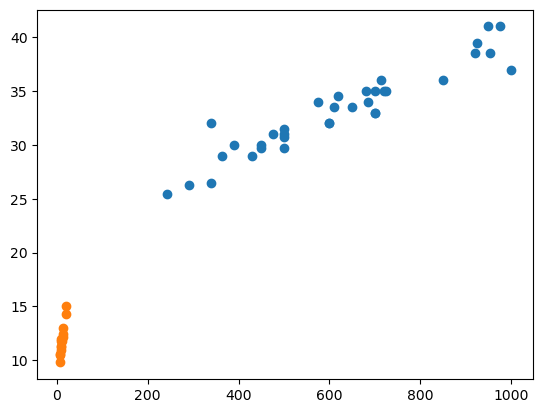

In [47]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 feature weight, length 로 bream, smelt 분류 가능함

plt.scatter(twofishDF.loc[:34, 'Weight'],twofishDF.loc[:34, 'Length'])
plt.scatter(twofishDF.loc[145:, 'Weight'],twofishDF.loc[145:, 'Length'])
plt.show()


<Axes: xlabel='Weight', ylabel='Length'>

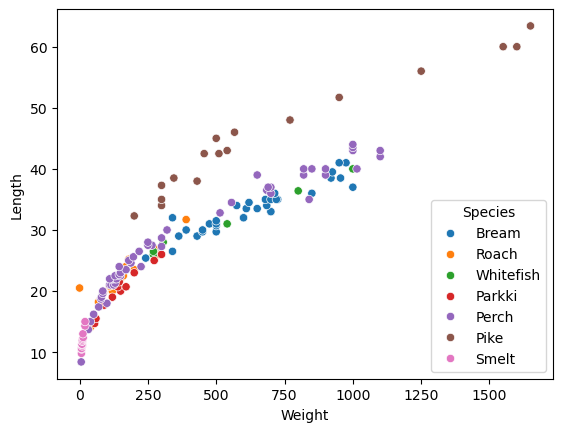

In [48]:
import seaborn as sns
sns.scatterplot(data=fishDF, x='Weight', y='Length',hue='Species')


In [49]:
# ndarray ==> list  형변환
names=fishDF['Species'].unique().tolist()
{name : idx for idx, name in enumerate(names,1) } # 딕셔너리 컴프리헨션 dict comprehension

{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

[3] 학습/훈련 진행
- 지도학습 ==>분류
- ML프레임워크 ==> Scikit-learn
- 학습알고리즘 ==> 최근접이웃 알고리즘 즉, KNN

In [50]:
# ndarray ==> list  형변환
names=fishDF['Species'].unique().tolist()
{name : idx for idx, name in enumerate(names,1) } # 딕셔너리 컴프리헨션 dict comprehension

{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

In [51]:
### 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [52]:
### [1] 학습 인스턴스 생성 ==> 클래스 명 (매개변수 값)
model=KNeighborsClassifier() # 매개변수 안주면 default값

In [53]:
print(model, model.n_neighbors)# 에러 model.classes_ # 기본값이 보이는 거

KNeighborsClassifier() 5


In [54]:
### [2] 학습/훈련 진행
# model.fit(feature2D, 타겟1D)
features=twofishDF[['Weight', 'Length']]
print(f'features.shape : {features.shape}, {features.ndim}D')

features.shape : (49, 2), 2D


In [55]:
target=twofishDF['Code']
print(f'target.shape : {target.shape}, {target.ndim}D')

target.shape : (49,), 1D


In [56]:
model.fit(features, target)

KNeighborsClassifier()

In [57]:
# 모델 파라미터 (Model Parameter) : 학습 후 설정되는 속성
# - 파라미터 이름 : XXX_ 
# 학습을 해야지만 값이 세팅 됨 (학습 전에 호출하면 에러남 no attribute 'classes_')
print(model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


[4] 검증 
- KNN 은 모델 즉, 규칙 및 패턴이 생성 X
- 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
- 지정된 k 개수만큼 검증 데이터와 가까운 데이터를 도출
- 분류일 경우 K 개수 데이터가 가진 라벨/타겟/클래스를 따라 다수결로 결정 

In [58]:
twofishDF.head()

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [59]:
# 검증 데이터와 타겟
data=twofishDF.loc[0,['Weight', 'Length']]
target=twofishDF.loc[0,'Code']

In [60]:
twofishDF.loc[0,['Weight', 'Length']]

Weight    242.0
Length     25.4
Name: 0, dtype: object

In [61]:
data=twofishDF.loc[[0],['Weight', 'Length']] #2차원이 됨

In [62]:
# 새로운 데이터에 대해서 결과를 예측
# - model.predict(2D) ==> 1D
pre_target=model.predict(data)

In [63]:
pre_target[0] 

1

In [64]:
target == pre_target
# 이게 True여야 맞춘거임

array([ True])

In [65]:
pre_target[0] == target
# 이게 True여야 맞춘거

True

In [66]:
# 검증 데이터와 타겟 2 
data=twofishDF.loc[:4,['Weight', 'Length']]
target=twofishDF.loc[:4,'Code']
data.shape, data.ndim, target.shape, target.ndim

((5, 2), 2, (5,), 1)

In [67]:
pre_target=model.predict(data)

In [68]:
pre_target == target


0    True
1    True
2    True
3    True
4    True
Name: Code, dtype: bool

In [69]:
# 예측결과와 정답을 비료해서 점수를 도출
# - model.score(2D 피쳐, 1D 타겟)
# - 결과 : 0.0 ~ 1.0 (1.0 가까이 나와야 좋은 결과 100%)
model.score(data, target)


1.0